# What is Linear Regression?

Linear Regression is a Supervised Learning algorithm used for predicting continuous values. It finds the best-fitting straight line (or hyperplane) that minimizes the difference between actual and predicted values.

**Intuition:**

Imagine plotting house prices (Y) based on their size in sqft (X). Linear regression draws a line that best fits this data so you can predict price based on size.

Mathematical Formulation:
Hypothesis Equation (Model):
y^=wx+b

y^: predicted output
x: Input Feature
w : Weight(slope)
B: Bias(Intercept)

For multiple Features:
Y_pred = w1.x1 + w2.x2 + ...... + wn.xn + bias

**Loss Function (Cost):**

To measure how well the model predicted correctly according to the given input feature.

Mean Squared Error(MSE) = 1/m Sum((yi_pred - yi_true)**2)
 where i ranges from i= 1....m

**Gradient Descent (Training):**
We minimize MSE using Gradient Descent:

Update rules for Weights and Bias:

wi = wi - alpha * dl/dwi

bi = b - alpha * dl/db

Alpha : Learning Rate
dl/dwi : Gradient of Loss w.r.t weight

Partial Derivatives:

dl/dwi = 2/m Sum(wx+b-y)x
dl/db = 2/m sum(wx+b-y)

**Types of Linear Regression:**

| Type                       | Description                                        |
| -------------------------- | -------------------------------------------------- |
| Simple Linear Regression   | 1 feature (x → y)                                  |
| Multiple Linear Regression | Multiple features (x₁, x₂, ... → y)                |
| Polynomial Regression      | Transform features $x^2, x^3, \dots$               |
| Ridge Regression           | L2 Regularization (adds penalty for large weights) |
| Lasso Regression           | L1 Regularization (can shrink weights to 0)        |
| Elastic Net                | Combines L1 + L2                                   |



(5,) (5,)
Trained weight: 1.000, bias: 0.819


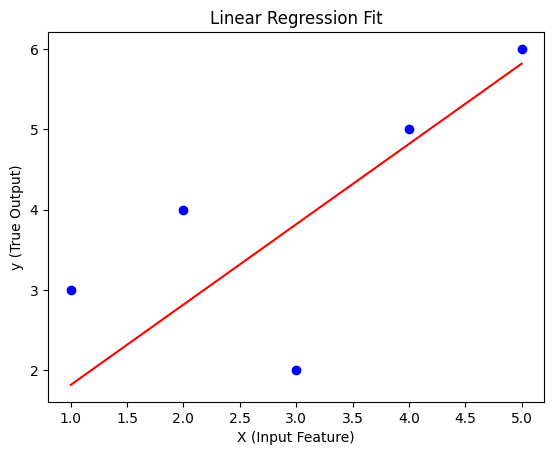

In [127]:
#Example: Manual Linear Regression (1D) in Python with NumPy
import numpy as np
import matplotlib.pyplot as plt

x_input = np.array([1, 2, 3, 4, 5])
y_true = np.array([3, 4, 2, 5, 6])

# Initialize parameters
weight = 0.1
bias = 0.1
lr = 0.01 # Learning Rate
epochs = 100 # No of Iterations to learn
m = len(x_input)

print(x_input.shape, y_true.shape)

for epoch in range(epochs):
  y_pred = x_input * weight + bias
  loss = y_pred - y_true

  dw = (2/m) * np.dot(loss, x_input)
  db = (2/m) * np.sum(loss)

  weight -= lr * dw
  bias -= lr * db

print(f"Trained weight: {weight:.3f}, bias: {bias:.3f}")


plt.scatter(x_input, y_true, color="blue")
plt.plot(x_input, weight*x_input + bias, color='red')
plt.xlabel("X (Input Feature)")
plt.ylabel("y (True Output)")
plt.title("Linear Regression Fit")
plt.show()

**Linear Regression Assumptions**

1. Linearity
2. Independence of errors
3. No multicollinearity
4. Errors are normally distributed

**Metrics to Evaluate:**

| Metric      | Formula                          |             |   |
| ----------- | -------------------------------- | ----------- | - |
| MSE         | $\frac{1}{n}\sum(\hat{y}-y)^2$   |             |   |
| RMSE        | $\sqrt{MSE}$                     |             |   |
| MAE         | $\frac{1}{n}\sum(\hat{y}-y)$     |             |   |
| $R^2$ Score | $1 - \frac{SS_{res}}{SS_{tot}}$  |             |   |


Epoch 0: Weight=55.06, Bias=2.02, Loss=442464285.71
Epoch 100: Weight=793.68, Bias=26.11, Loss=4592771.41
Epoch 200: Weight=794.37, Bias=22.65, Loss=4590087.27
Epoch 300: Weight=794.50, Bias=19.16, Loss=4587655.78
Epoch 400: Weight=794.63, Bias=15.68, Loss=4585225.95
Epoch 500: Weight=794.76, Bias=12.20, Loss=4582797.79
Epoch 600: Weight=794.89, Bias=8.72, Loss=4580371.31
Epoch 700: Weight=795.02, Bias=5.24, Loss=4577946.49
Epoch 800: Weight=795.15, Bias=1.76, Loss=4575523.33
Epoch 900: Weight=795.28, Bias=-1.72, Loss=4573101.85

Final Model:
Weight (slope): 795.41
Bias (intercept): -5.16


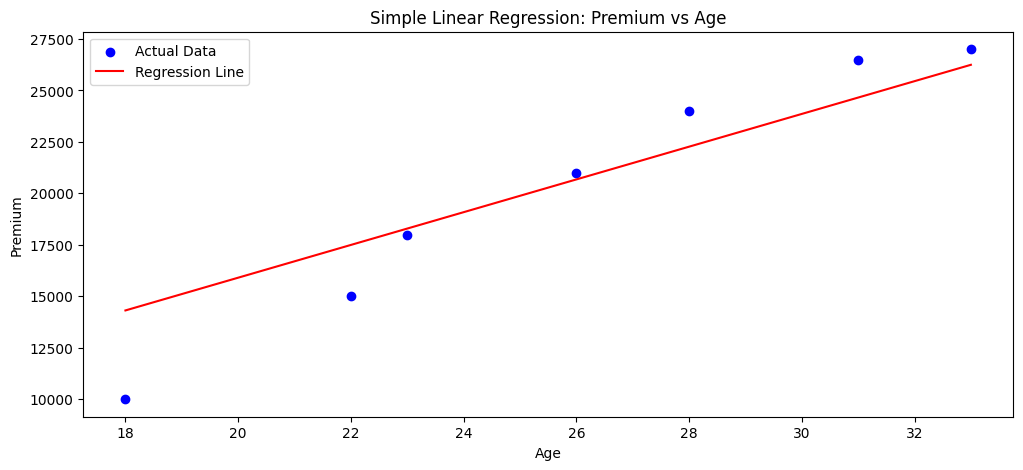

In [159]:
#Implement Linear Regression from Kaggle insurance Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("/content/insurance.csv")
x = data['Age'].values
y = data['Premium'].values

# Initialize parameters
weight = 0.0
bias = 0.0
learning_rate = 0.0001  # Reduced learning rate for stability
epochs = 1000
n = len(x)

# Training loop
for epoch in range(epochs):
    # Prediction
    y_pred = weight * x + bias

    # Calculate gradients
    error = y_pred - y
    dw = (1/n) * np.dot(x, error)  # Derivative of loss w.r.t weight
    db = (1/n) * np.sum(error)     # Derivative of loss w.r.t bias

    # Update parameters
    weight -= learning_rate * dw
    bias -= learning_rate * db

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        loss = np.mean(error**2)
        print(f"Epoch {epoch}: Weight={weight:.2f}, Bias={bias:.2f}, Loss={loss:.2f}")

# Final results
print("\nFinal Model:")
print(f"Weight (slope): {weight:.2f}")
print(f"Bias (intercept): {bias:.2f}")

# Plot results
plt.figure(figsize=(12,5))
plt.scatter(x, y, color="blue", label="Actual Data")
plt.plot(x, weight * x + bias, color="red", label="Regression Line")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.title("Simple Linear Regression: Premium vs Age")
plt.legend()
plt.show()

In [164]:
Age = 32
predicted_premium = weight * Age + bias
print(f"\nPredicted Premium for {Age} years: {predicted_premium:,.2f}")


Predicted Premium for 32 years: 25,447.90
